## ICI - Índice da Indústria (IBRE - FGV) (contém desagregações NUCI e Nível de Estoques)

In [8]:
# Importando bibliotecas necessárias:

import requests # biblioteca para acessar e interagir com APIs e páginas da web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Bibliotecas para decomposição de séries:

from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
#Biblioteca para Análise de Estacionariedade por Teste de ADF

from statsmodels.tsa.stattools import adfuller

In [11]:
# Biblioteca para Geração de Gráfico de Função de Autocorrelação e Autocorrelação Parcial

from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.graphics.tsaplots import plot_pacf

### Carregamento do dados fornecidos pelo IBRE em formato xlsx

In [12]:
#Carregamento de dados em formato xlsx

# Caminho do arquivo Excel
caminho_arquivo = 'Dados/Sondagem_Industrial_2.0_SA_2024.xlsx'

# Nome da planilha
nome_planilha = 'INDÚSTRIA DE TRANSFORMAÇÃO'

# Carregar os dados da planilha específica
df_industria = pd.read_excel(caminho_arquivo, sheet_name=nome_planilha)

# Exibir as primeiras linhas do dataframe
df_industria.head()

,Unnamed: 0,Sondagem da Indústria,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,INDÚSTRIA DE TRANSFORMAÇÃO - DADOS DESSAZONALI...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,Demanda Total,Demanda interna,Demanda externa,Nível de estoques,Situação atual dos negócios,NUCI,Demanda Total Prevista,Demanda interna prevista,Demanda externa prevista,...,NaN,Produção prevista,NaN,NaN,Emprego previsto,NaN,NaN,Tendência dos negócios,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Menor,Maior,Igual,Menor,Maior,Igual,Menor,Melhor,Igual,Pior
4,2001-01-01,104,103.8,97.7,96.8,117.9,82.9,125.8,128.2,124.3,...,13.8,45.3,33.7,19.9,24,59.9,15.2,56.8,38.4,6


In [13]:
#Cópia do dataframe df_industria contendo apenas as colunas dos indicadores e indicadores ponderados

df_industria_27 = df_industria.iloc[:, :27].copy()

In [14]:
df_industria_27.head(5)

,Unnamed: 0,Sondagem da Indústria,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,INDÚSTRIA DE TRANSFORMAÇÃO - DADOS DESSAZONALI...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ÍNDICES-SÍNTESE (EM PONTOS),NaN,NaN
2,NaT,Demanda Total,Demanda interna,Demanda externa,Nível de estoques,Situação atual dos negócios,NUCI,Demanda Total Prevista,Demanda interna prevista,Demanda externa prevista,...,Situação atual dos negócios,Demanda Total Prevista,Demanda interna prevista,Demanda externa prevista,Produção prevista,Emprego previsto,Tendência dos negócios,ICI,ISA,IE
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-01-01,104,103.8,97.7,96.8,117.9,82.9,125.8,128.2,124.3,...,109.8,110.4,109.6,135.2,101.9,100.3,109.2,105.7,107.3,103.9


In [15]:
# Eliminando as linhas 0, 1 e 3 do dataframe df_industria_27

df_industria_27 = df_industria_27.drop([0, 1, 3]).reset_index(drop=True)
df_industria_27.head()

,Unnamed: 0,Sondagem da Indústria,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NaT,Demanda Total,Demanda interna,Demanda externa,Nível de estoques,Situação atual dos negócios,NUCI,Demanda Total Prevista,Demanda interna prevista,Demanda externa prevista,...,Situação atual dos negócios,Demanda Total Prevista,Demanda interna prevista,Demanda externa prevista,Produção prevista,Emprego previsto,Tendência dos negócios,ICI,ISA,IE
1,2001-01-01,104,103.8,97.7,96.8,117.9,82.9,125.8,128.2,124.3,...,109.8,110.4,109.6,135.2,101.9,100.3,109.2,105.7,107.3,103.9
2,2001-02-01,100,100.6,97.3,93.7,116.6,82.7,136.7,142.6,126.1,...,109,121.5,122.5,138.9,116,104.2,109.6,107,103.7,110.1
3,2001-03-01,96,96.6,96.4,91.5,113.5,82.6,127.3,131.9,119.8,...,107.2,111.9,112.9,126.2,108,101,109.5,103.4,100.4,106.3
4,2001-04-01,94.1,94.1,97.3,89,110.3,81.9,131.4,133.2,121.2,...,105.3,116.1,114.1,129,108.9,99.9,109,101.7,97.4,106


In [16]:
#Criando uma lista com os dados da linha 0 para servir de nomes das colunas posteriormente

linha_0_lista = df_industria_27.iloc[0].astype(str).tolist()

In [17]:
linha_0_lista

['NaT',
 'Demanda Total',
 'Demanda interna',
 'Demanda externa',
 'Nível de estoques',
 'Situação atual dos negócios',
 'NUCI',
 'Demanda Total Prevista',
 'Demanda interna prevista',
 'Demanda externa prevista',
 'Produção prevista',
 'Emprego  previsto',
 'Tendência dos negócios',
 'Demanda Total',
 'Demanda interna',
 'Demanda externa',
 'Nível de estoques',
 'Situação atual dos negócios',
 'Demanda Total Prevista',
 'Demanda interna prevista',
 'Demanda externa prevista',
 'Produção prevista',
 'Emprego  previsto',
 'Tendência dos negócios',
 'ICI',
 'ISA',
 'IE']

In [18]:
#Renomeando primeiro elemento da lista para Data

linha_0_lista[0] = "Data"

In [19]:
linha_0_lista

['Data',
 'Demanda Total',
 'Demanda interna',
 'Demanda externa',
 'Nível de estoques',
 'Situação atual dos negócios',
 'NUCI',
 'Demanda Total Prevista',
 'Demanda interna prevista',
 'Demanda externa prevista',
 'Produção prevista',
 'Emprego  previsto',
 'Tendência dos negócios',
 'Demanda Total',
 'Demanda interna',
 'Demanda externa',
 'Nível de estoques',
 'Situação atual dos negócios',
 'Demanda Total Prevista',
 'Demanda interna prevista',
 'Demanda externa prevista',
 'Produção prevista',
 'Emprego  previsto',
 'Tendência dos negócios',
 'ICI',
 'ISA',
 'IE']

In [20]:
#Renomeando as colunas de df_industria_27 com os dados da lista

df_industria_27.columns = linha_0_lista
df_industria_27.head()

,Data,Demanda Total,Demanda interna,Demanda externa,Nível de estoques,Situação atual dos negócios,NUCI,Demanda Total Prevista,Demanda interna prevista,Demanda externa prevista,...,Situação atual dos negócios,Demanda Total Prevista,Demanda interna prevista,Demanda externa prevista,Produção prevista,Emprego previsto,Tendência dos negócios,ICI,ISA,IE
0,NaT,Demanda Total,Demanda interna,Demanda externa,Nível de estoques,Situação atual dos negócios,NUCI,Demanda Total Prevista,Demanda interna prevista,Demanda externa prevista,...,Situação atual dos negócios,Demanda Total Prevista,Demanda interna prevista,Demanda externa prevista,Produção prevista,Emprego previsto,Tendência dos negócios,ICI,ISA,IE
1,2001-01-01,104,103.8,97.7,96.8,117.9,82.9,125.8,128.2,124.3,...,109.8,110.4,109.6,135.2,101.9,100.3,109.2,105.7,107.3,103.9
2,2001-02-01,100,100.6,97.3,93.7,116.6,82.7,136.7,142.6,126.1,...,109,121.5,122.5,138.9,116,104.2,109.6,107,103.7,110.1
3,2001-03-01,96,96.6,96.4,91.5,113.5,82.6,127.3,131.9,119.8,...,107.2,111.9,112.9,126.2,108,101,109.5,103.4,100.4,106.3
4,2001-04-01,94.1,94.1,97.3,89,110.3,81.9,131.4,133.2,121.2,...,105.3,116.1,114.1,129,108.9,99.9,109,101.7,97.4,106


In [21]:
#Eliminando linha 0 do dataframe (é igual ao nome das colunas)

df_industria_27 = df_industria_27.drop(0).reset_index(drop=True)
df_industria_27.head()

,Data,Demanda Total,Demanda interna,Demanda externa,Nível de estoques,Situação atual dos negócios,NUCI,Demanda Total Prevista,Demanda interna prevista,Demanda externa prevista,...,Situação atual dos negócios,Demanda Total Prevista,Demanda interna prevista,Demanda externa prevista,Produção prevista,Emprego previsto,Tendência dos negócios,ICI,ISA,IE
0,2001-01-01,104,103.8,97.7,96.8,117.9,82.9,125.8,128.2,124.3,...,109.8,110.4,109.6,135.2,101.9,100.3,109.2,105.7,107.3,103.9
1,2001-02-01,100,100.6,97.3,93.7,116.6,82.7,136.7,142.6,126.1,...,109,121.5,122.5,138.9,116,104.2,109.6,107,103.7,110.1
2,2001-03-01,96,96.6,96.4,91.5,113.5,82.6,127.3,131.9,119.8,...,107.2,111.9,112.9,126.2,108,101,109.5,103.4,100.4,106.3
3,2001-04-01,94.1,94.1,97.3,89,110.3,81.9,131.4,133.2,121.2,...,105.3,116.1,114.1,129,108.9,99.9,109,101.7,97.4,106
4,2001-05-01,91.2,90.1,93.8,88.3,104.9,80.8,120.2,122.8,112.9,...,102.1,104.7,104.8,112.3,100.6,98.2,105.9,98.3,95.1,101.6


## Ajuste do formato de data para AAAA - MM - DD

In [26]:
#Download da biblioteca de formatação de data
from datetime import datetime

In [27]:
# Criação de um dataframe do tipo datetime

date_rng = pd.date_range(start = '1/31/2001', 
                         end = '12/31/2024', 
                         freq = 'M')

In [28]:
#Checando se o comprimento do dataframe de data é igual ao comprimento do dataframe df_industria_27

len(date_rng) == len(df_industria_27.index)

True

In [29]:
#Inclusão do dataframe date_rng no dataframe

df_industria_27.insert(0,        # coluna de indice 0
            'Mês',    # nome da nova coluna
            date_rng)  # dados

In [31]:
#Exclusão da coluna "Data"

df_industria_27 = df_industria_27.drop(["Data"], axis = 1)

In [32]:
df_industria_27.head()

,Mês,Demanda Total,Demanda interna,Demanda externa,Nível de estoques,Situação atual dos negócios,NUCI,Demanda Total Prevista,Demanda interna prevista,Demanda externa prevista,...,Situação atual dos negócios,Demanda Total Prevista,Demanda interna prevista,Demanda externa prevista,Produção prevista,Emprego previsto,Tendência dos negócios,ICI,ISA,IE
0,2001-01-31,104,103.8,97.7,96.8,117.9,82.9,125.8,128.2,124.3,...,109.8,110.4,109.6,135.2,101.9,100.3,109.2,105.7,107.3,103.9
1,2001-02-28,100,100.6,97.3,93.7,116.6,82.7,136.7,142.6,126.1,...,109,121.5,122.5,138.9,116,104.2,109.6,107,103.7,110.1
2,2001-03-31,96,96.6,96.4,91.5,113.5,82.6,127.3,131.9,119.8,...,107.2,111.9,112.9,126.2,108,101,109.5,103.4,100.4,106.3
3,2001-04-30,94.1,94.1,97.3,89,110.3,81.9,131.4,133.2,121.2,...,105.3,116.1,114.1,129,108.9,99.9,109,101.7,97.4,106
4,2001-05-31,91.2,90.1,93.8,88.3,104.9,80.8,120.2,122.8,112.9,...,102.1,104.7,104.8,112.3,100.6,98.2,105.9,98.3,95.1,101.6


### Criação do dataframe dos dados dos Indicadores Brutos (em pontos)

In [33]:
#Criação de um dataframe cópia contendo os Indicadores Brutos do ICI

df_ici_bruto = df_industria_27.iloc[:,0:13].copy()

df_ici_bruto.head(5)

,Mês,Demanda Total,Demanda interna,Demanda externa,Nível de estoques,Situação atual dos negócios,NUCI,Demanda Total Prevista,Demanda interna prevista,Demanda externa prevista,Produção prevista,Emprego previsto,Tendência dos negócios
0,2001-01-31,104,103.8,97.7,96.8,117.9,82.9,125.8,128.2,124.3,122.1,107.9,149.3
1,2001-02-28,100,100.6,97.3,93.7,116.6,82.7,136.7,142.6,126.1,138.5,112.5,150
2,2001-03-31,96,96.6,96.4,91.5,113.5,82.6,127.3,131.9,119.8,129.2,108.7,149.9
3,2001-04-30,94.1,94.1,97.3,89,110.3,81.9,131.4,133.2,121.2,130.2,107.4,148.8
4,2001-05-31,91.2,90.1,93.8,88.3,104.9,80.8,120.2,122.8,112.9,120.6,105.4,142.8


### Criação de dataframe dos dados dos Indicadores Ponderados (média 100 e desvio padrão 10)

In [34]:
#Criação de um dataframe cópia contendo os Indicadores Ponderados do ICI:

df_ici_pond = df_industria_27.iloc[:, [0] + list(range(13, df_industria_27.shape[1]-3))].copy()

df_ici_pond.head(5)

,Mês,Demanda Total,Demanda interna,Demanda externa,Nível de estoques,Situação atual dos negócios,Demanda Total Prevista,Demanda interna prevista,Demanda externa prevista,Produção prevista,Emprego previsto,Tendência dos negócios
0,2001-01-31,106.9,105,113,104.7,109.8,110.4,109.6,135.2,101.9,100.3,109.2
1,2001-02-28,104.1,103,112.5,97.7,109,121.5,122.5,138.9,116,104.2,109.6
2,2001-03-31,101.3,100.6,111.3,92.7,107.2,111.9,112.9,126.2,108,101,109.5
3,2001-04-30,100,99,112.5,87.1,105.3,116.1,114.1,129,108.9,99.9,109
4,2001-05-31,98,96.5,107.9,85.5,102.1,104.7,104.8,112.3,100.6,98.2,105.9


### Criação de dataframe dos dados do ICI, ISA e ICE

ICI: Índice de Confiança da Indústria

ISA: Índice de Avaliação sobre o Momento Atual

IE: Índice de Previsões em Relação ao Futuro Próximo

In [35]:
#Criação de um dataframe cópia contendo os Indicadores Finais:

df_ici_ind = df_industria_27.iloc[:, [0] + list(range(df_industria_27.shape[1]-3, df_industria_27.shape[1]))].copy()

df_ici_ind.head(5)

,Mês,ICI,ISA,IE
0,2001-01-31,105.7,107.3,103.9
1,2001-02-28,107,103.7,110.1
2,2001-03-31,103.4,100.4,106.3
3,2001-04-30,101.7,97.4,106
4,2001-05-31,98.3,95.1,101.6


## Dataframe de Indicadores Brutos - Análise dos Dados

Do dataframe de dados brutos os indicadores que são de interesse para o desenvolvimento do modelo de previsão da inflação de bens industriais são:

Nível de estoques

NUCI (Nível de Utilização da Capacidade Instalada)

### Gráfico das Séries Temporais de Nível de Estoques e NUCI

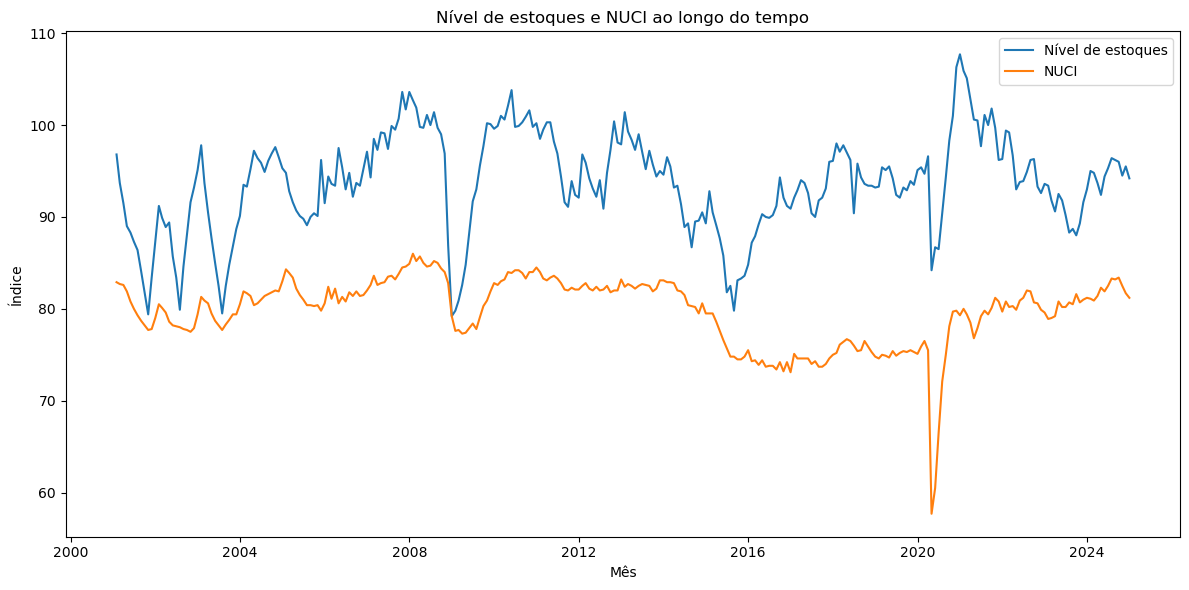

In [36]:
plt.figure(figsize=(12,6))
plt.plot(df_ici_bruto['Mês'], df_ici_bruto['Nível de estoques'], label='Nível de estoques')
plt.plot(df_ici_bruto['Mês'], df_ici_bruto['NUCI'], label='NUCI')
plt.xlabel('Mês')
plt.ylabel('Índice')
plt.title('Nível de estoques e NUCI ao longo do tempo')
plt.legend()
plt.tight_layout()
plt.show()

### Análise de Estacionariedade das Séries

#### Série de Nível de Estoques

In [37]:
df_ici_bruto.columns

Index(['Mês', 'Demanda Total', 'Demanda interna', 'Demanda externa',
       'Nível de estoques', 'Situação atual dos negócios', 'NUCI',
       'Demanda Total Prevista', 'Demanda interna prevista',
       'Demanda externa prevista', 'Produção prevista', 'Emprego  previsto',
       'Tendência dos negócios'],
      dtype='object')

In [38]:
#Teste de ADF - Nível de Estoques

resultado = adfuller(df_ici_bruto["Nível de estoques"])
print('Estatística do Teste ADF: %f' % resultado[0])
print('p-value: %f' % resultado[1])
print('Valores Críticos:')
for key, value in resultado[4].items():
    print('\t%s: %.3f' % (key, value))

Estatística do Teste ADF: -3.919671
p-value: 0.001895
Valores Críticos:
	1%: -3.454
	5%: -2.872
	10%: -2.572


As hipóteses do teste de ADF são:

H0: times series não é estacionária e

H1: time series é estacionária.

Se p-valor é menor do que o nível de confiança escolhido, então a hipótese nula é rejeitada.

Logo, no caso de nível de confiança de 95%, se rejeita a hipótese nula de que a série do Nível dos Estoques não seja estacionária. A série é, portanto, estacionária.

#### Série do NUCI (Nível de utilização da capacidade instalada)

In [39]:
#Teste de ADF - NUCI

resultado = adfuller(df_ici_bruto["NUCI"])
print('Estatística do Teste ADF: %f' % resultado[0])
print('p-value: %f' % resultado[1])
print('Valores Críticos:')
for key, value in resultado[4].items():
    print('\t%s: %.3f' % (key, value))

Estatística do Teste ADF: -2.976562
p-value: 0.037142
Valores Críticos:
	1%: -3.454
	5%: -2.872
	10%: -2.572


As hipóteses do teste de ADF são:

H0: times series não é estacionária e

H1: time series é estacionária.

Se p-valor é menor do que o nível de confiança escolhido, então a hipótese nula é rejeitada.

Logo, no caso de nível de confiança de 95%, se rejeita a hipótese nula de que a série do NUCI não seja estacionária. A série é, portanto, estacionária.

### Decomposição das Séries

#### Nível de Estoques

In [41]:
# Multiplicative Decomposition  - Não é adequado para séries com valores 0 e negativos.
#Portanto, será utilizada a additive decomposition.


# Additive Decomposition
additive_decomposition = seasonal_decompose(df_ici_bruto["Nível de estoques"], model='additive', period = 12)

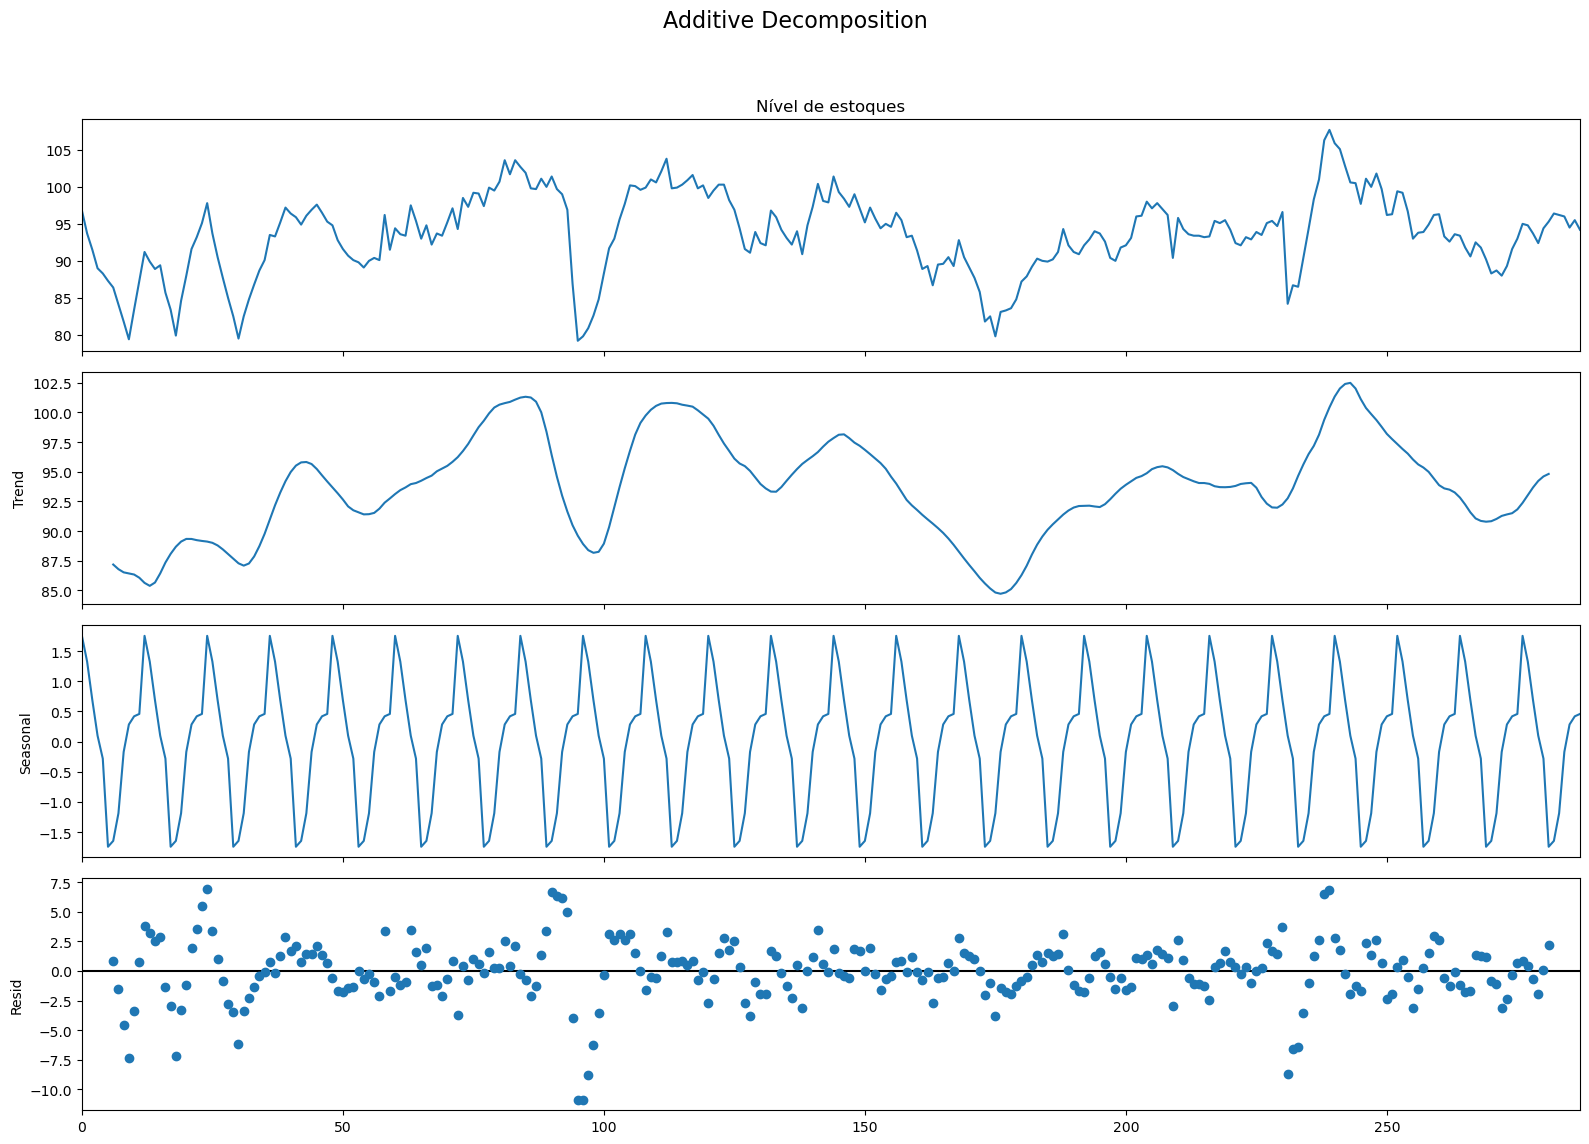

In [42]:
# Plot do Gráfico
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

#### NUCI - Nível de utilização da capacidade instalada

In [43]:
# Multiplicative Decomposition  - Não é adequado para séries com valores 0 e negativos.
#Portanto, será utilizada a additive decomposition.


# Additive Decomposition
additive_decomposition = seasonal_decompose(df_ici_bruto["NUCI"], model='additive', period = 12)

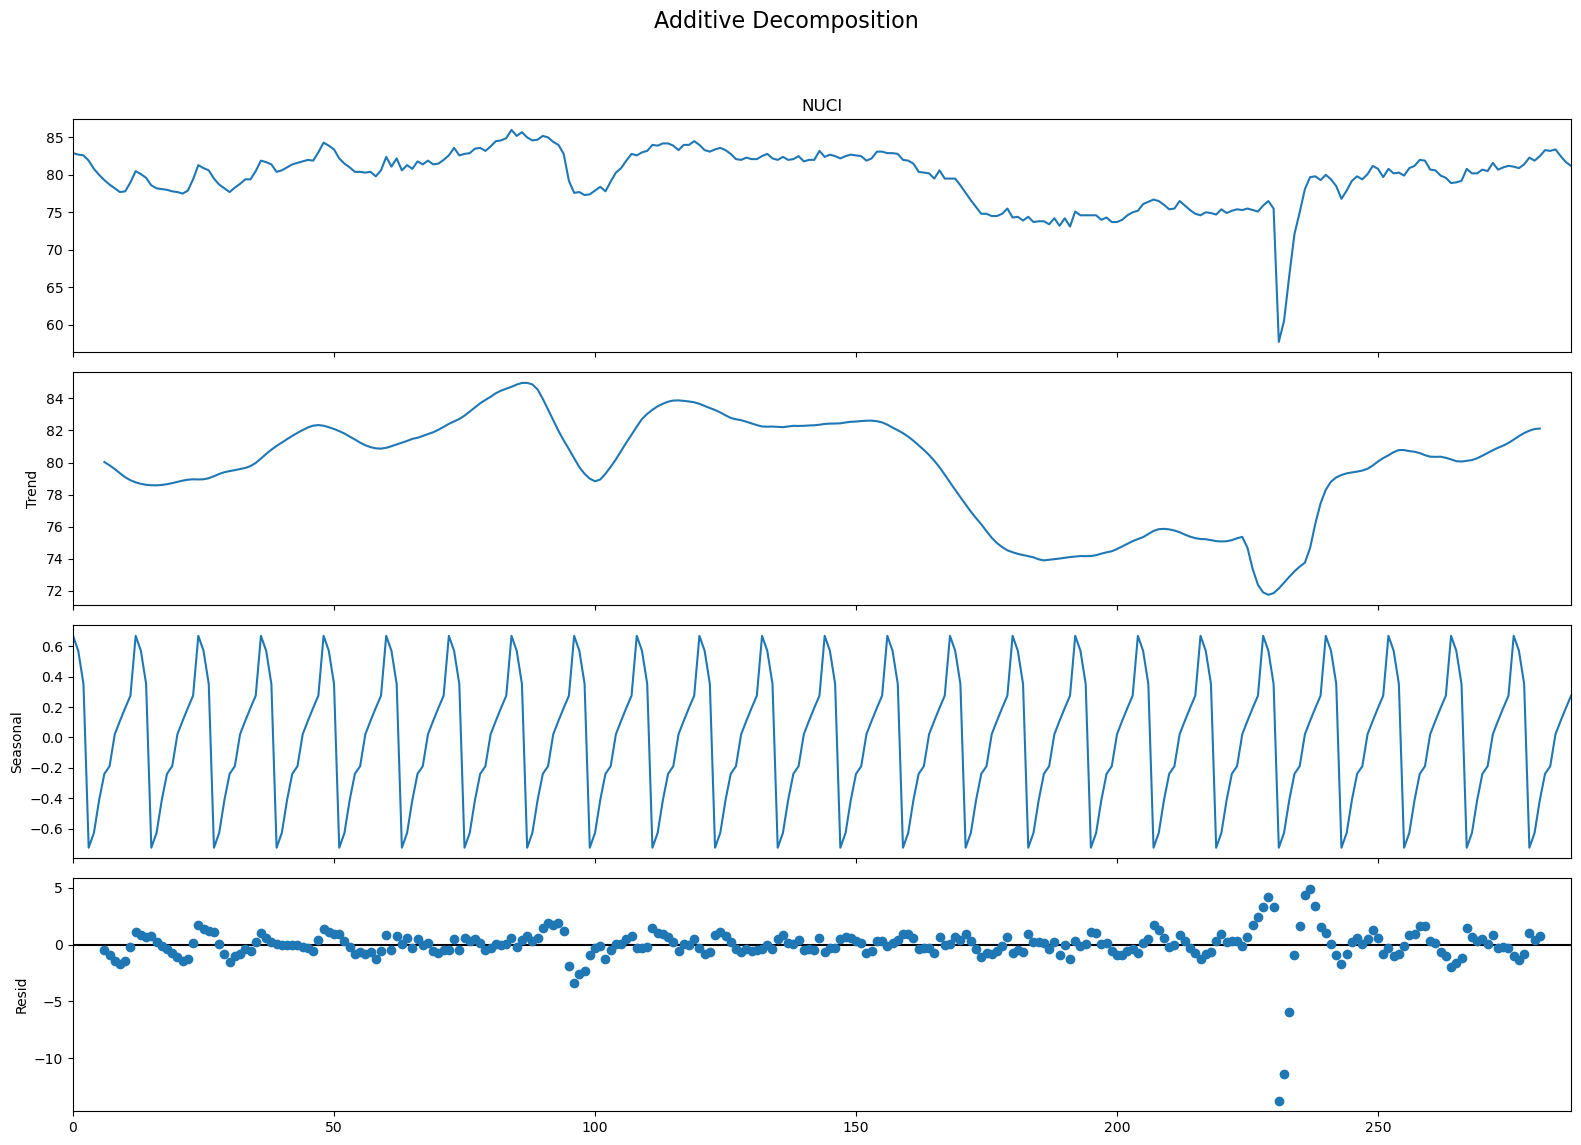

In [44]:
# Plot do Gráfico
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Gráficos de Autocorrelação e Autocorrelação Parcial

#### Nível de Estoques

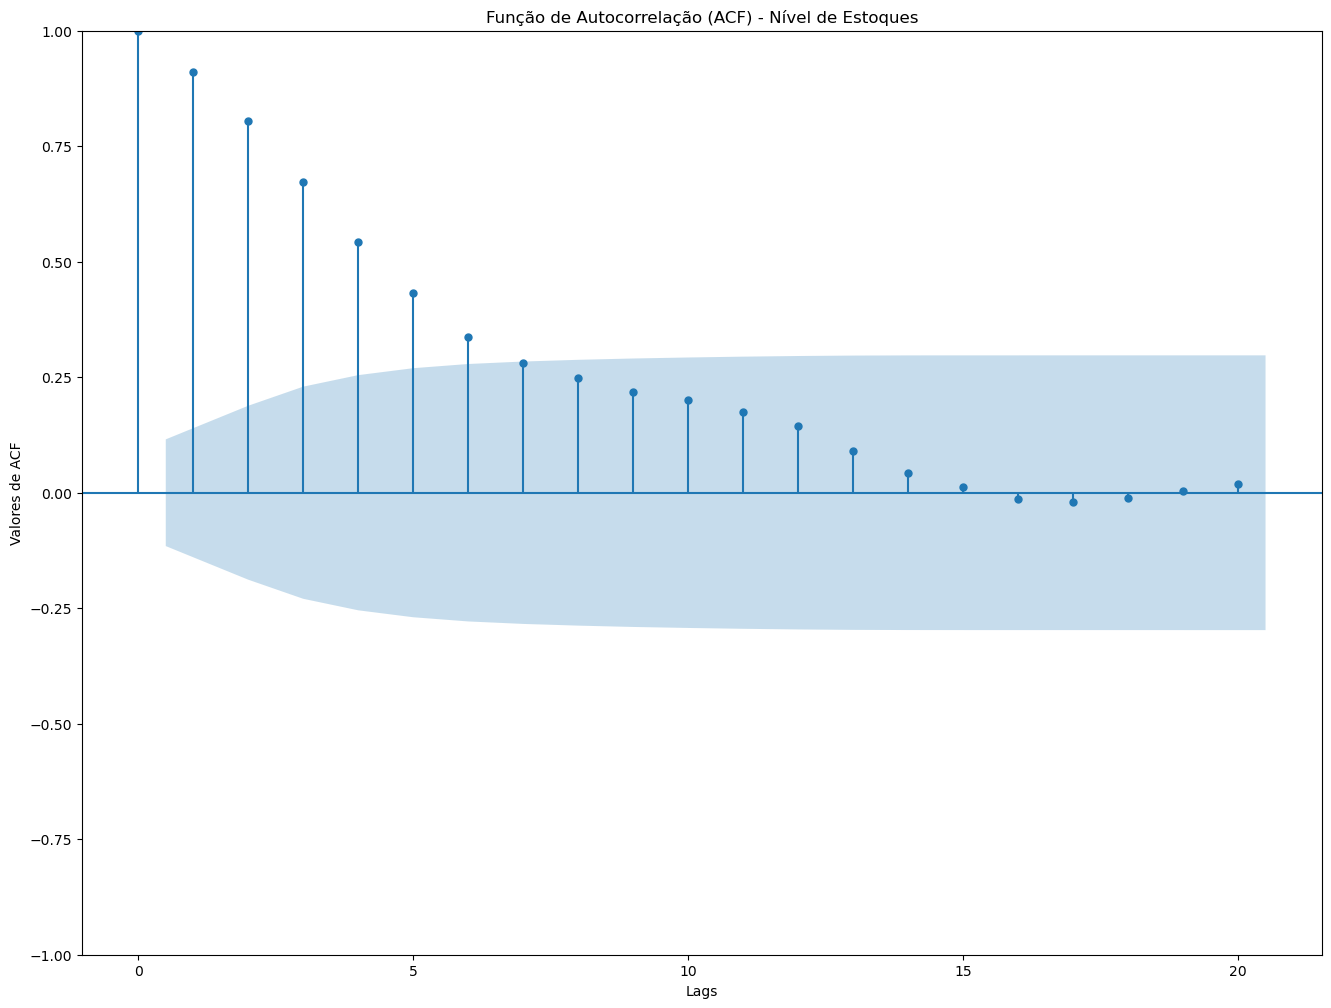

In [45]:
#Gráfico de ACF

plot_acf(df_ici_bruto["Nível de estoques"], lags=20)
plt.title("Função de Autocorrelação (ACF) - Nível de Estoques")
plt.xlabel("Lags")
plt.ylabel("Valores de ACF")
plt.show()

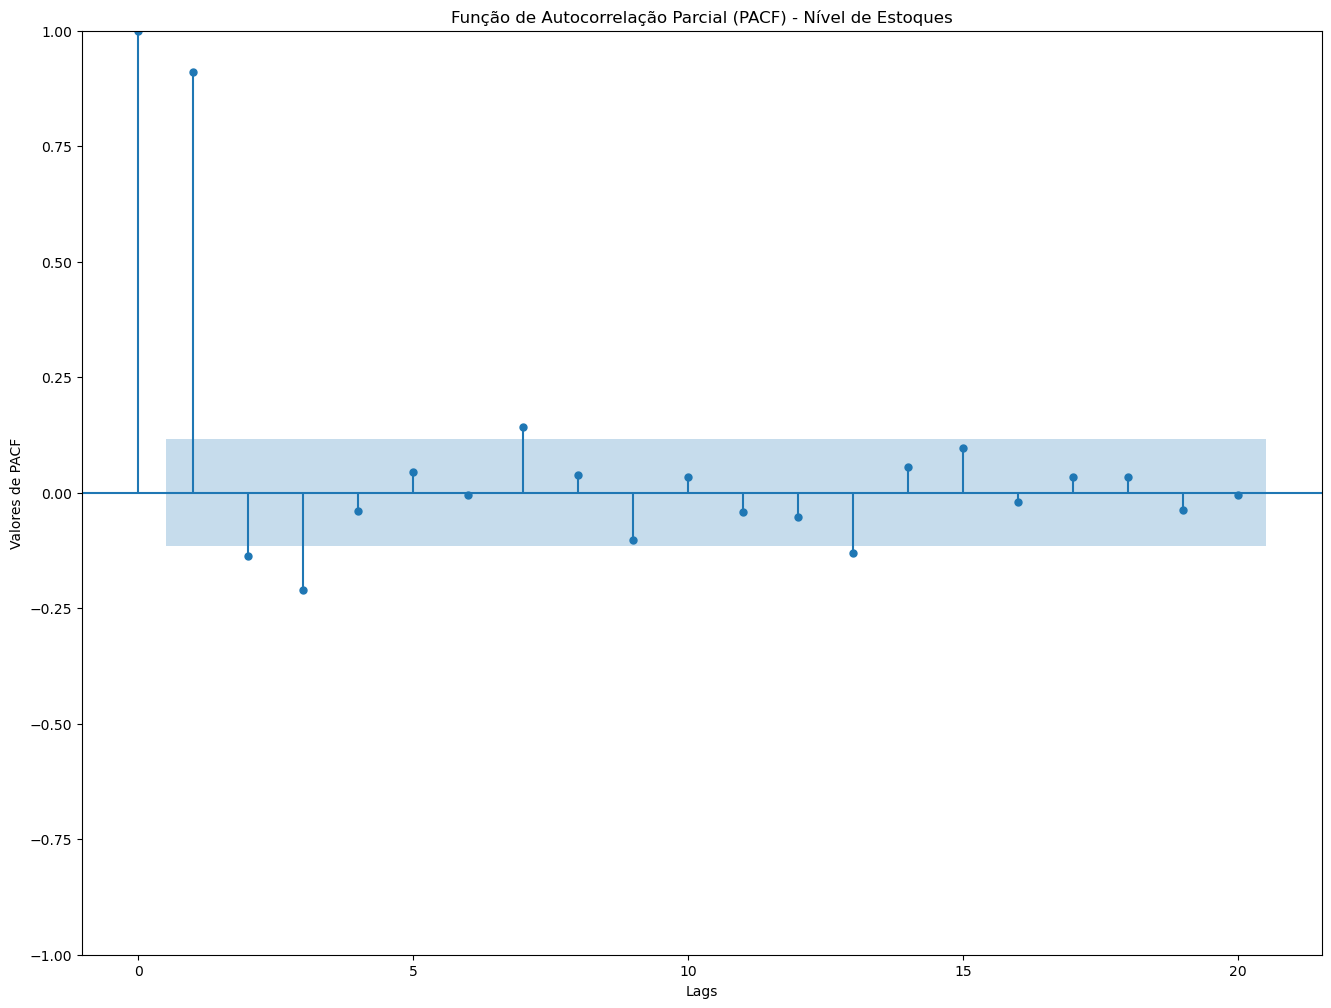

In [46]:
#Gráfico de PACF

plot_pacf(df_ici_bruto["Nível de estoques"], lags=20)
plt.title("Função de Autocorrelação Parcial (PACF) - Nível de Estoques")
plt.xlabel("Lags")
plt.ylabel("Valores de PACF")
plt.show()

#### NUCI - Nível de Utilização da Capacidade Instalada

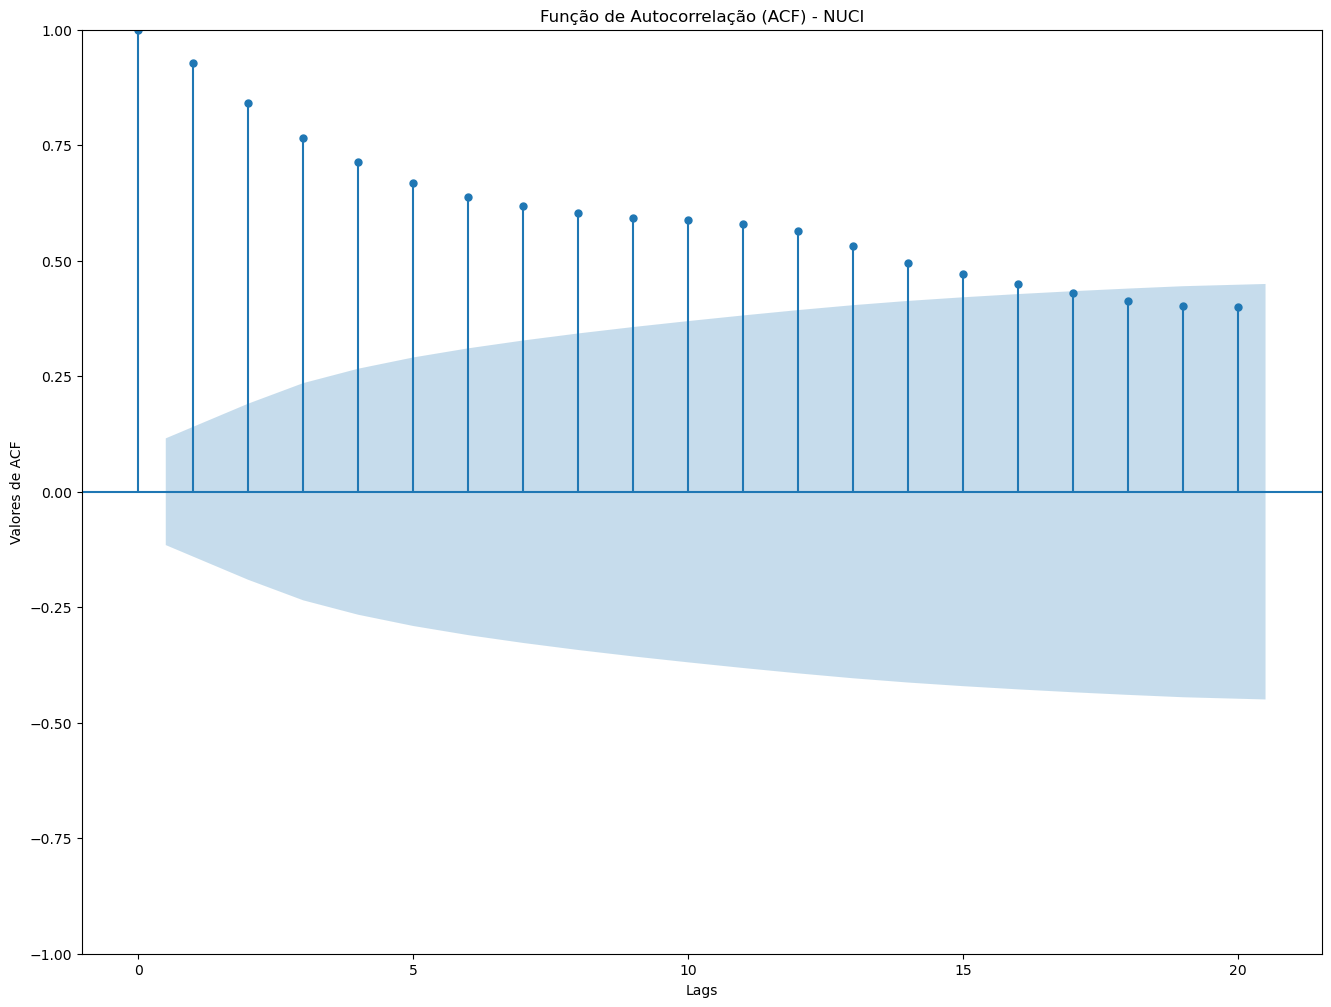

In [47]:
#Gráfico de ACF

plot_acf(df_ici_bruto["NUCI"], lags=20)
plt.title("Função de Autocorrelação (ACF) - NUCI")
plt.xlabel("Lags")
plt.ylabel("Valores de ACF")
plt.show()

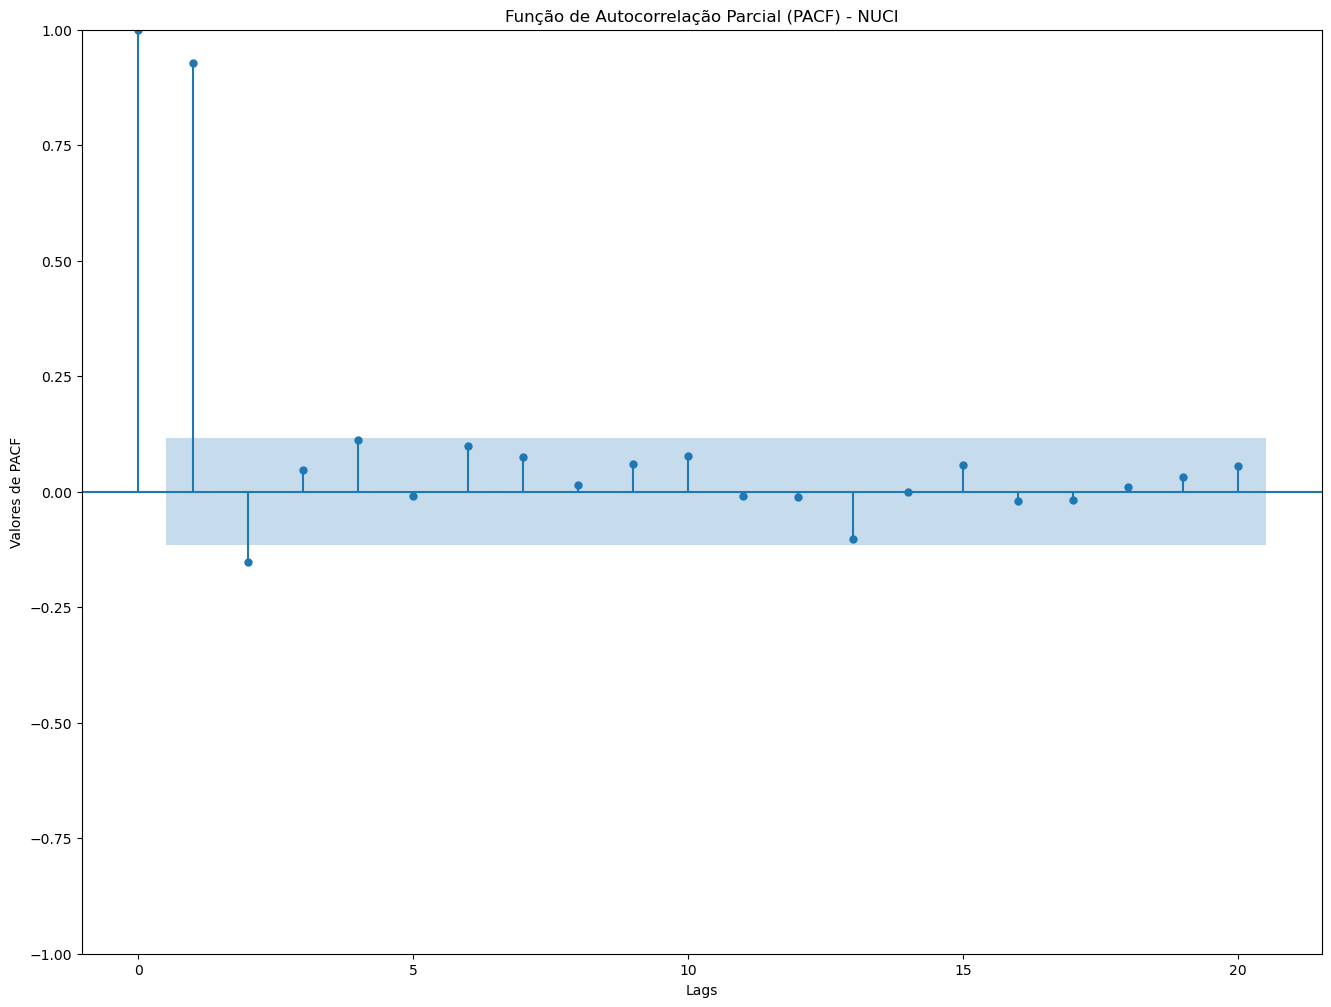

In [48]:
#Gráfico de PACF

plot_pacf(df_ici_bruto["NUCI"], lags=20)
plt.title("Função de Autocorrelação Parcial (PACF) - NUCI")
plt.xlabel("Lags")
plt.ylabel("Valores de PACF")
plt.show()

## Dataframe dos Indicadores Finais

Dos 3 indicadores (ICI, ISA e IE) somente o ICI é de interesse para o desenvolvimento do modelo de previsão da inflação de bens industriais.

O Índice de Confiança da Sondagem da Indústria (ICI) é composto por seis indicadores, conforme descrição abaixo:

Avaliação sobre o momento atual (ISA)
1. Demanda total
2. Nível de estoques
3. Situação atual dos negócios

Previsões em relação ao futuro próximo (IE)
1. Produção prevista para os três meses seguintes
2. Emprego previsto para os três meses seguintes
3. Tendência dos negócios nos seis meses seguintes

O Índice de Confiança da Indústria de Transformação (ICI) é representado pela média aritmética dos seis indicadores padronizados que compõem o ISA e o IE

### Gráfico da Série Temporal do ICI

In [49]:
df_ici_ind.columns

Index(['Mês', 'ICI', 'ISA', 'IE'], dtype='object')

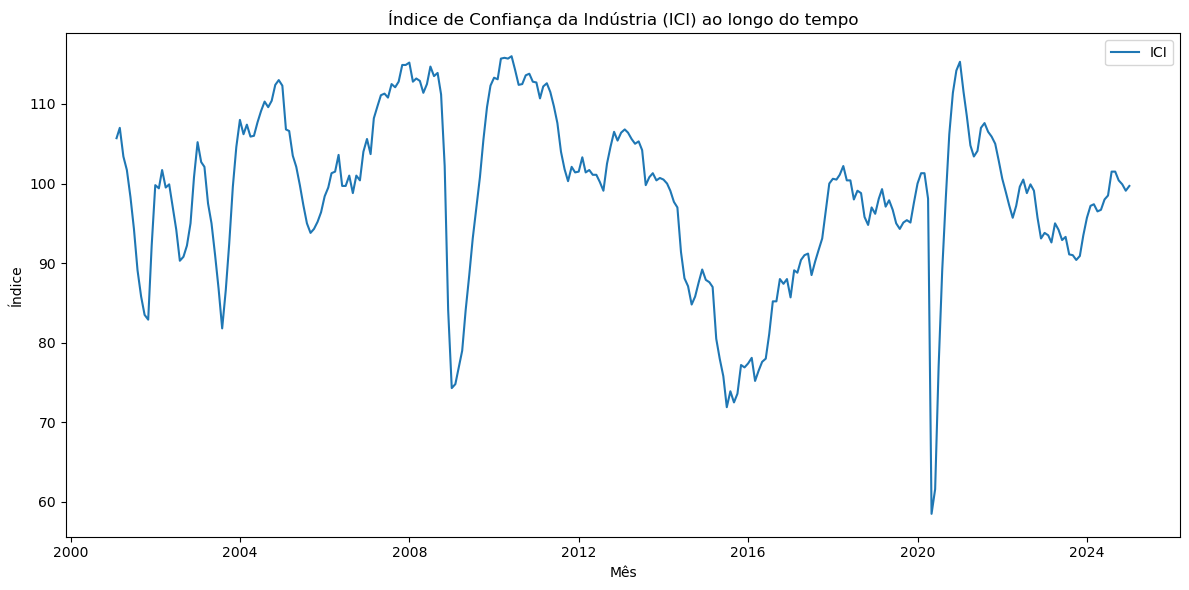

In [51]:
plt.figure(figsize=(12,6))
plt.plot(df_ici_ind['Mês'], df_ici_ind['ICI'], label='ICI')
plt.xlabel('Mês')
plt.ylabel('Índice')
plt.title('Índice de Confiança da Indústria (ICI) ao longo do tempo')
plt.legend()
plt.tight_layout()
plt.show()

### Análise de Estacionariedade das Séries

In [53]:
#Teste de ADF - ICI

resultado = adfuller(df_ici_ind["ICI"])
print('Estatística do Teste ADF: %f' % resultado[0])
print('p-value: %f' % resultado[1])
print('Valores Críticos:')
for key, value in resultado[4].items():
    print('\t%s: %.3f' % (key, value))

Estatística do Teste ADF: -4.721998
p-value: 0.000076
Valores Críticos:
	1%: -3.453
	5%: -2.872
	10%: -2.572


As hipóteses do teste de ADF são:

H0: times series não é estacionária e

H1: time series é estacionária.

Se p-valor é menor do que o nível de confiança escolhido, então a hipótese nula é rejeitada.

Logo, no caso de nível de confiança de 95%, se rejeita a hipótese nula de que a série do ICI não seja estacionária. A série é, portanto, estacionária.

### Decomposição da Série

In [54]:
# Multiplicative Decomposition  - Não é adequado para séries com valores 0 e negativos.
#Portanto, será utilizada a additive decomposition.


# Additive Decomposition
additive_decomposition = seasonal_decompose(df_ici_ind["ICI"], model='additive', period = 12)

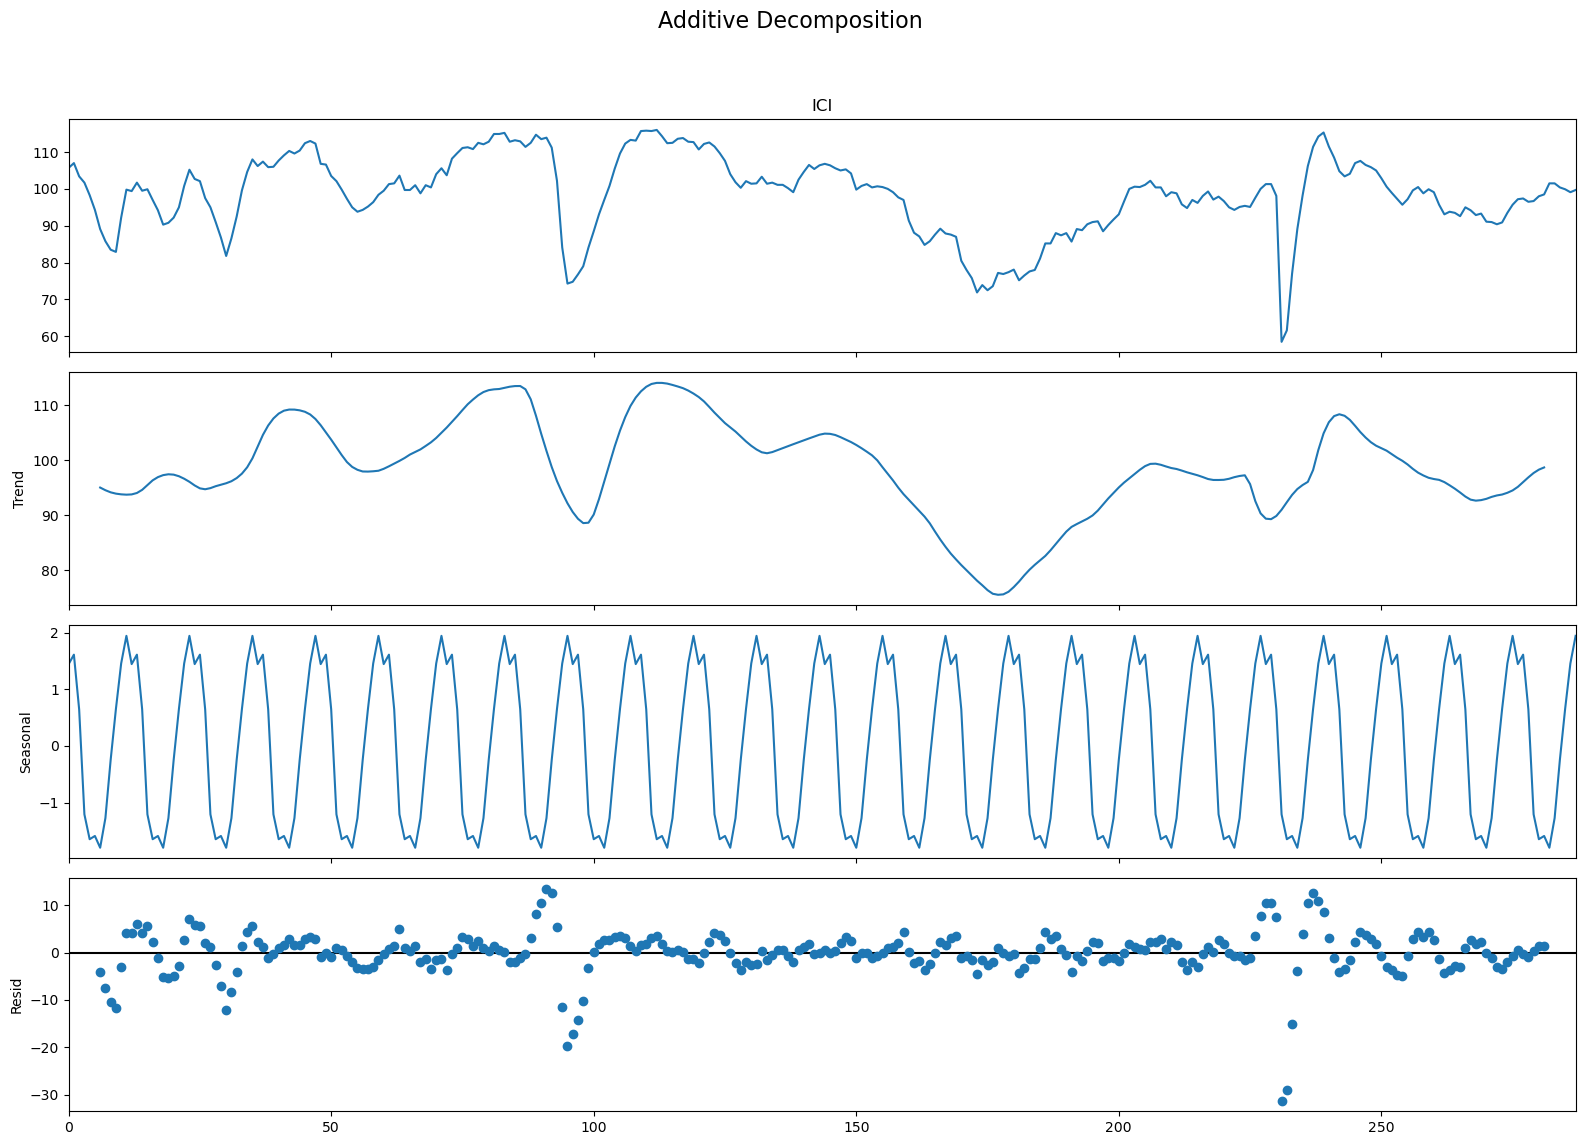

In [55]:
# Plot do Gráfico
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Gráficos de Autocorrelação e Autocorrelação Parcial

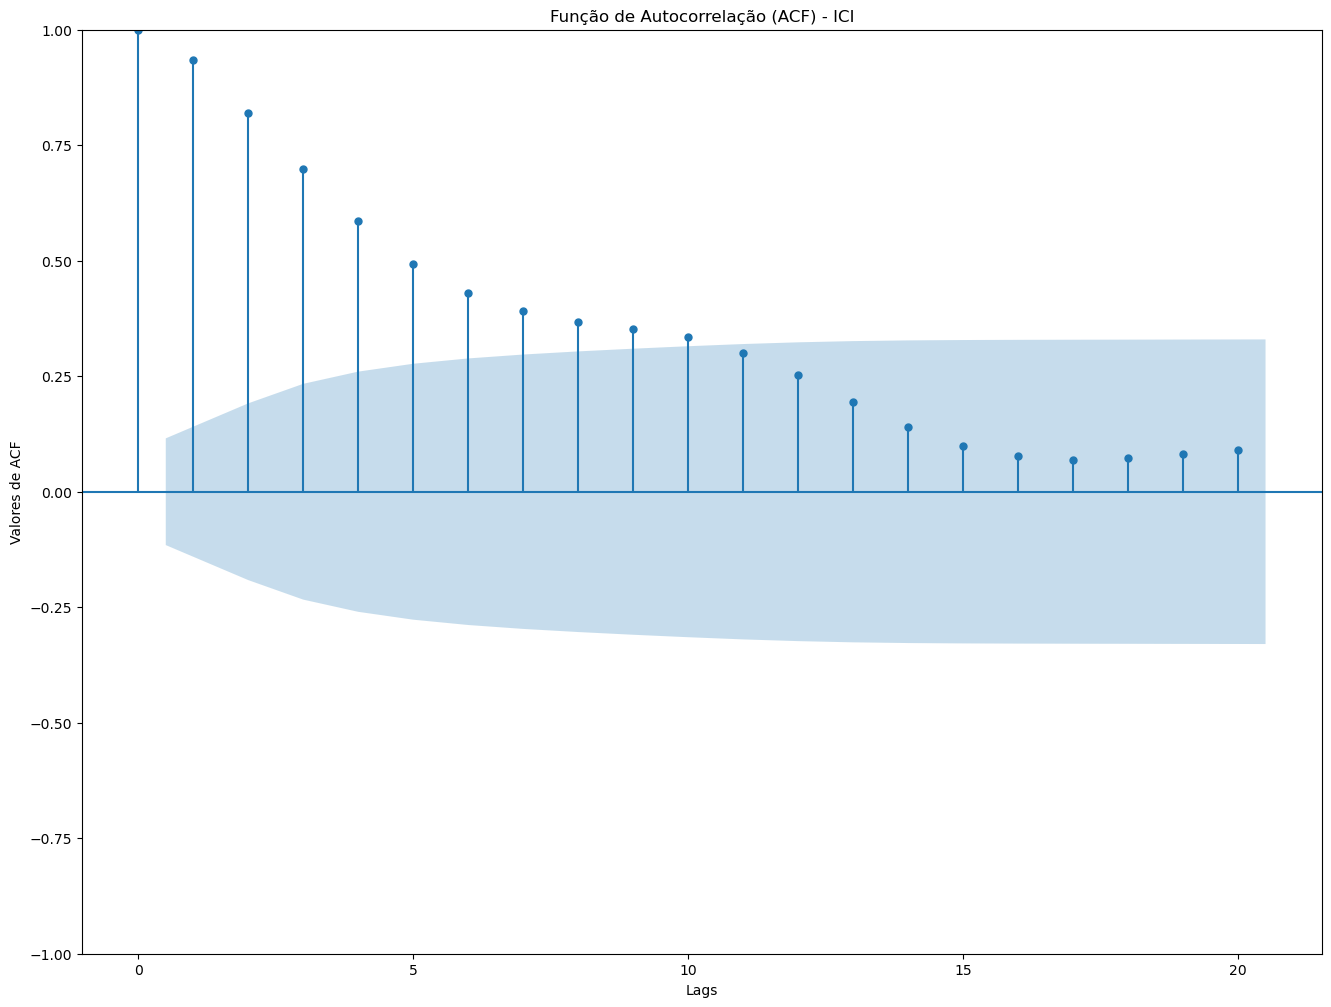

In [56]:
#Gráfico de ACF

plot_acf(df_ici_ind["ICI"], lags=20)
plt.title("Função de Autocorrelação (ACF) - ICI")
plt.xlabel("Lags")
plt.ylabel("Valores de ACF")
plt.show()

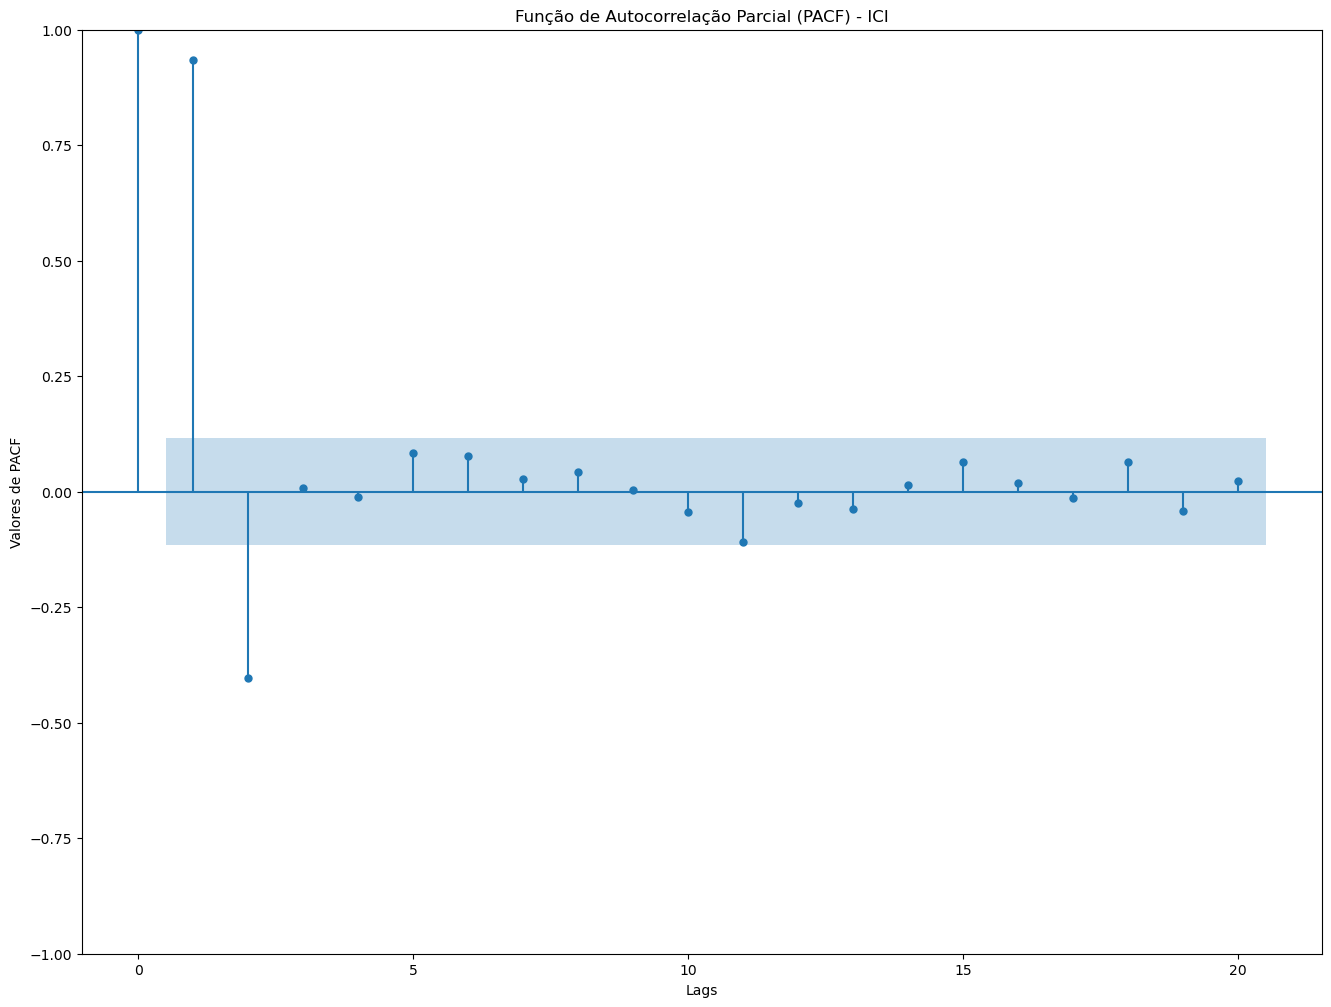

In [57]:
#Gráfico de PACF

plot_pacf(df_ici_ind["ICI"], lags=20)
plt.title("Função de Autocorrelação Parcial (PACF) - ICI")
plt.xlabel("Lags")
plt.ylabel("Valores de PACF")
plt.show()

### Criação de arquivos em csv para posterior uso em modelo de previsão

In [58]:
df_ici_bruto.to_csv("base_dados_ici_bruto.csv", index=False)

In [59]:
df_ici_pond.to_csv("base_dados_ici_pond.csv", index=False)

In [60]:
df_ici_ind.to_csv("base_dados_ici_ind.csv", index=False)